In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import value_counts

# Import data
df = pd.read_csv('medical_examination.csv')

In [4]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [29]:
df['bmi']= df['weight']/(df['height']/100)**2
df['overweight']= np.where(df['bmi']>25, 1, 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [30]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [31]:
df['gluc'] = np.where(df['gluc']<=1, 0, 1)
df['cholesterol'] = np.where(df['cholesterol']<=1, 0, 1)
df.head(100)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,0,0,0,0,1,0,21.230572,0
96,131,19258,2,165,65.0,110,70,0,0,0,0,1,0,23.875115,0
97,132,18410,1,165,99.0,150,110,0,0,0,0,0,1,36.363636,1
98,133,21860,2,170,100.0,120,80,0,0,0,0,0,1,34.602076,1


In [32]:
df_red = df.head(500)
df_red.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [33]:
df_long=pd.melt(df, 
                id_vars=["id","cardio"],
                value_vars=["active","alco","cholesterol","gluc","overweight","smoke"])
df_long.head()

,id,cardio,variable,value
0,0,0,active,1
1,1,1,active,1
2,2,1,active,0
3,3,1,active,1
4,4,0,active,0


<Figure size 2000x500 with 0 Axes>

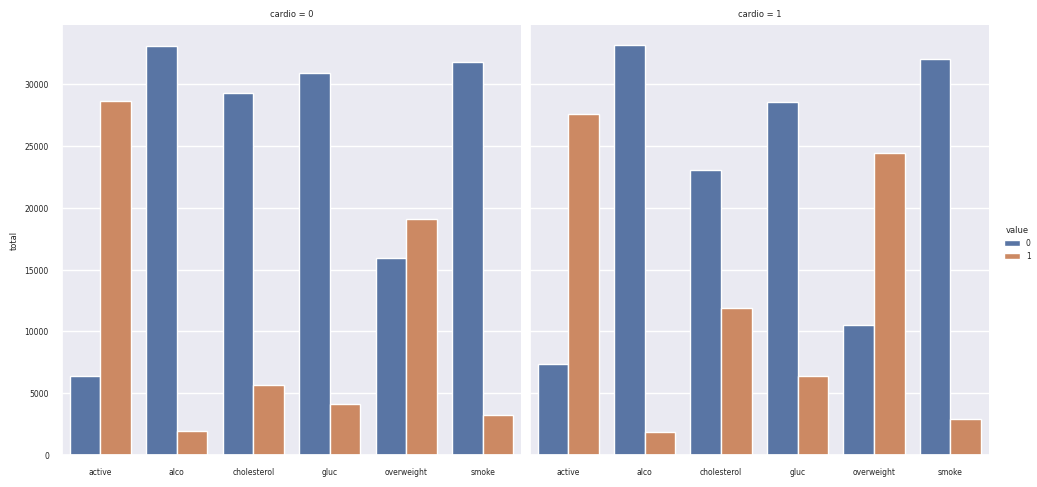

In [52]:
#plt.figure(figsize=(20,5))
fig =plt.figure(figsize=(20,5))
fig.axes
g = sns.catplot(x="variable",hue="value",
                kind="count", legend=True,col="cardio",
                data=df_long)
g.set_axis_labels("", "total")
#fig, axes = plt.subplots(figsize=(10, 5))

#fig = plt.subplots()
#plt.ylabel("total..................")
#axes.set_xlabel("variable")
#axes.set_ylabel("total")

In [ ]:
rect = l, b, w, h
fig = plt.figure()
fig.add_axes(rect)
fig.add_axes(rect, frameon=False, facecolor='g')
fig.add_axes(rect, polar=True)
ax = fig.add_axes(rect, projection='polar')
fig.delaxes(ax)
fig.add_axes(ax)

In [ ]:
df_catplot = sns.catplot(x="variable",hue="value",
                kind="count", legend=True,col="cardio",
                data=df_long)
figure = df_catplot.get_figure()

figure.set_xlabel("variable")
figure.set_ylabel("total")

In [35]:
condition = df['ap_lo'] <= df['ap_hi']
df_clean = df[condition]

condition = df_clean['height'] >= df_clean['height'].quantile(0.025)
df_clean = df_clean[condition]

condition = df_clean['height'] <= df_clean['height'].quantile(0.975)
df_clean = df_clean[condition]

condition = df_clean['weight'] >= df_clean['weight'].quantile(0.025)
df_clean = df_clean[condition]

condition = df_clean['weight'] <= df_clean['weight'].quantile(0.975)
df_clean = df_clean[condition]

df_clean =df_clean.drop("bmi", axis=1)
df_clean



,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [36]:
df_clean_red =df_clean.head(500)
df_clean_red

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,813,18382,1,161,87.0,110,90,0,0,1,0,1,1,1
568,816,16034,1,176,96.0,110,80,1,1,0,0,1,0,1
569,817,17420,2,175,88.0,140,90,1,0,1,1,0,1,1
570,818,21974,2,161,71.0,120,70,0,1,0,0,1,1,1


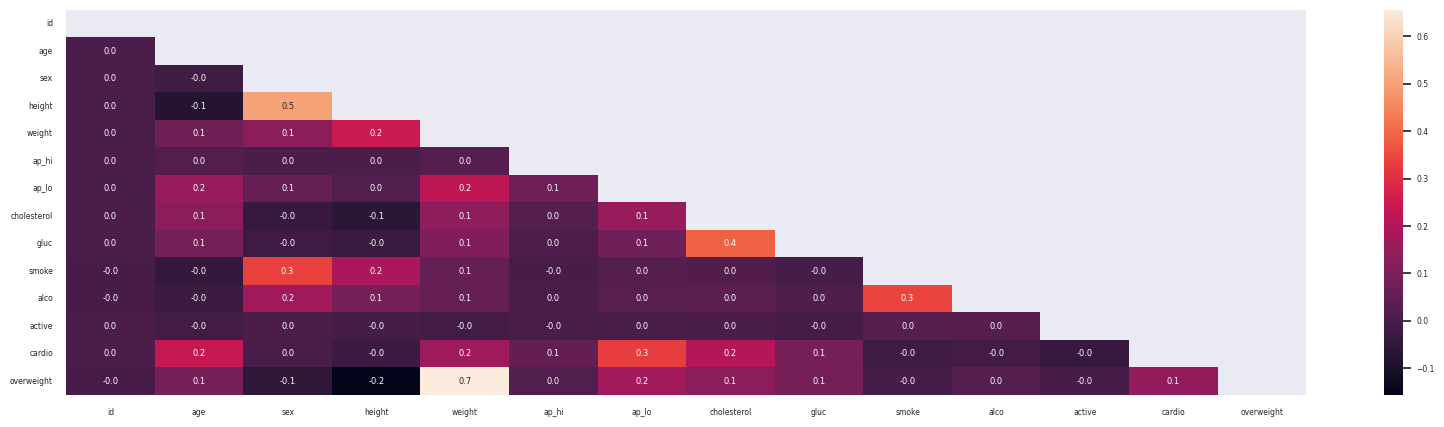

In [38]:
# creating mask
mask = np.triu(np.ones_like(df_clean.corr()))

# Set up the matplotlib figure
#fig, ax = plt.subplots(x,y)
#fig = plt.figure
fig =plt.figure(figsize=(20,5))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(df_clean.corr(), annot=True, mask=mask, fmt=".1f", cmap="rocket")
sns.set(font_scale=.5)